### dataset URL: https://www.kaggle.com/code/dpamgautam/stock-price-prediction-lstm-gru-rnn

In [8]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt

In [9]:
df=pd.read_csv('AABA_2006-01-01_to_2018-01-01.csv')

In [10]:
df.head()

,Date,Open,High,Low,Close,Volume,Name
0,2006-01-03,39.69,41.22,38.79,40.91,24232729,AABA
1,2006-01-04,41.22,41.90,40.77,40.97,20553479,AABA
2,2006-01-05,40.93,41.73,40.85,41.53,12829610,AABA
3,2006-01-06,42.88,43.57,42.80,43.21,29422828,AABA
4,2006-01-09,43.10,43.66,42.82,43.42,16268338,AABA


In [11]:
df['Value'] = (df.Open+df.High+df.Low+df.Close)/4

In [12]:
df=df[['Date','Value']]

In [13]:
df = df.rename(columns={'Date': 'ds',
                        'Value': 'y'})

In [14]:
df

,ds,y
0,2006-01-03,40.1525
1,2006-01-04,41.2150
2,2006-01-05,41.2600
3,2006-01-06,43.1150
4,2006-01-09,43.2500
...,...,...
3014,2017-12-22,71.5225
3015,2017-12-26,70.4550
3016,2017-12-27,70.0025
3017,2017-12-28,69.9425


In [15]:
df.dtypes

ds     object
y     float64
dtype: object

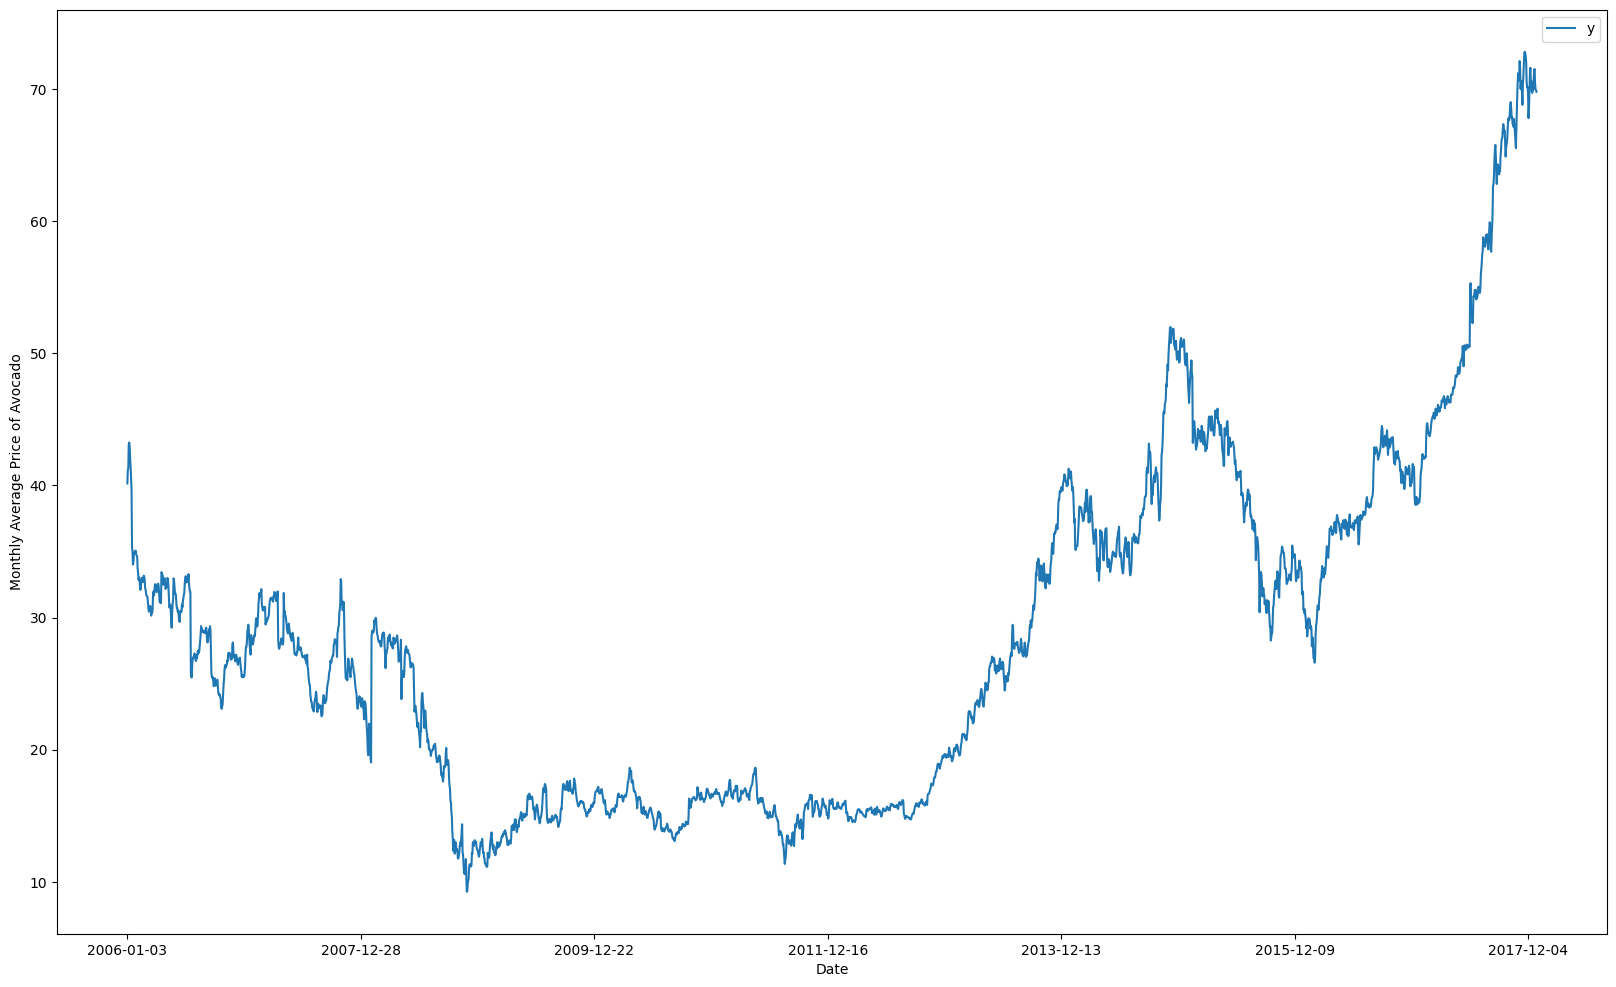

In [16]:
ax = df.set_index('ds').plot(figsize=(20, 12))
ax.set_ylabel('Monthly Average Price of Avocado')
ax.set_xlabel('Date')

plt.show()

In [17]:
m = Prophet()
m.fit(df)
future = m.make_future_dataframe(periods=500)
forecast = m.predict(future)
forecast

19:21:45 - cmdstanpy - INFO - Chain [1] start processing
19:21:47 - cmdstanpy - INFO - Chain [1] done processing


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2006-01-03,35.330026,31.022787,39.207850,35.330026,35.330026,-0.300666,-0.300666,-0.300666,-0.832190,-0.832190,-0.832190,0.531524,0.531524,0.531524,0.0,0.0,0.0,35.029360
1,2006-01-04,35.308581,30.971477,38.892522,35.308581,35.308581,-0.344161,-0.344161,-0.344161,-0.861641,-0.861641,-0.861641,0.517480,0.517480,0.517480,0.0,0.0,0.0,34.964420
2,2006-01-05,35.287136,30.759745,38.973078,35.287136,35.287136,-0.339091,-0.339091,-0.339091,-0.837400,-0.837400,-0.837400,0.498309,0.498309,0.498309,0.0,0.0,0.0,34.948045
3,2006-01-06,35.265692,31.127902,39.060436,35.265692,35.265692,-0.317251,-0.317251,-0.317251,-0.790613,-0.790613,-0.790613,0.473361,0.473361,0.473361,0.0,0.0,0.0,34.948440
4,2006-01-09,35.201357,30.821289,38.789516,35.201357,35.201357,-0.435624,-0.435624,-0.435624,-0.794785,-0.794785,-0.794785,0.359161,0.359161,0.359161,0.0,0.0,0.0,34.765733
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3514,2019-05-09,82.170744,68.630933,96.019303,69.356743,96.270567,-0.617477,-0.617477,-0.617477,-0.837400,-0.837400,-0.837400,0.219923,0.219923,0.219923,0.0,0.0,0.0,81.553267
3515,2019-05-10,82.209178,67.496031,95.901744,69.359677,96.346583,-0.589276,-0.589276,-0.589276,-0.790613,-0.790613,-0.790613,0.201336,0.201336,0.201336,0.0,0.0,0.0,81.619902
3516,2019-05-11,82.247612,70.966538,98.867107,69.365538,96.440429,2.242250,2.242250,2.242250,2.058314,2.058314,2.058314,0.183936,0.183936,0.183936,0.0,0.0,0.0,84.489861
3517,2019-05-12,82.286045,70.745727,98.945120,69.372613,96.548856,2.226642,2.226642,2.226642,2.058315,2.058315,2.058315,0.168327,0.168327,0.168327,0.0,0.0,0.0,84.512687


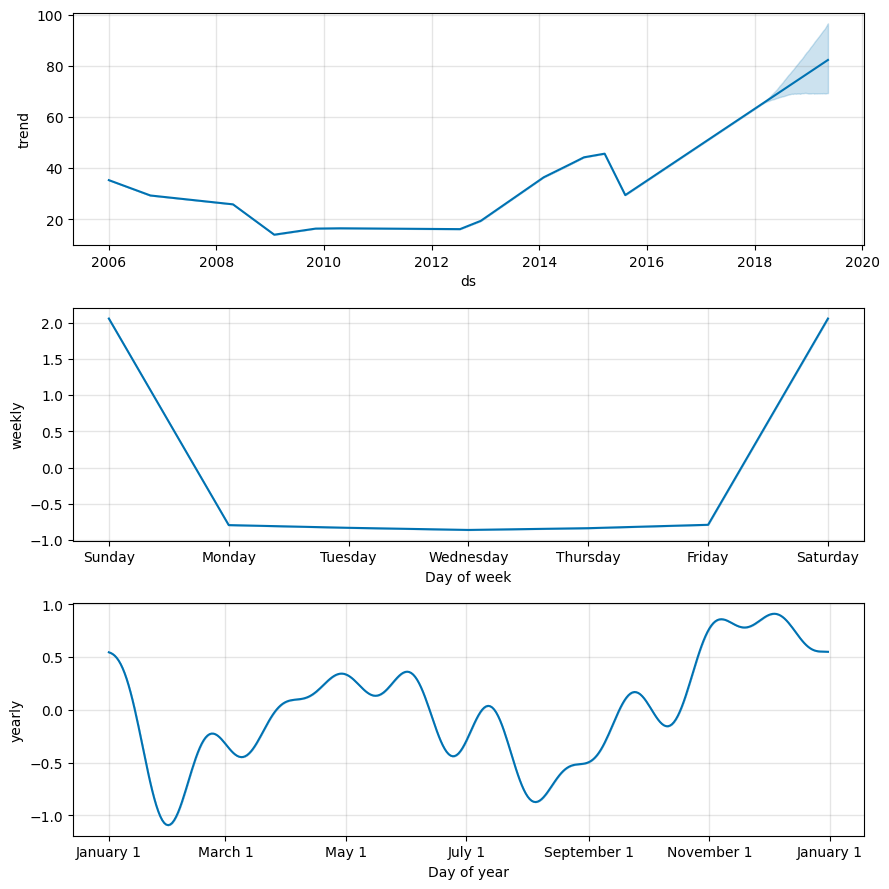

In [18]:
fig2 = m.plot_components(forecast)

In [19]:
forecastnew = forecast['ds']
forecastnew2 = forecast['yhat']

forecastnew = pd.concat([forecastnew,forecastnew2], axis=1)

mask = (forecastnew['ds'] > "2017-12-28") & (forecastnew['ds'] <= "2019-05-13")
forecastedvalues = forecastnew.loc[mask]

mask = (forecastnew['ds'] > "2006-01-03") & (forecastnew['ds'] <= "2017-12-29")
forecastnew = forecastnew.loc[mask]

Red = Predicted Values, Blue = Base Values


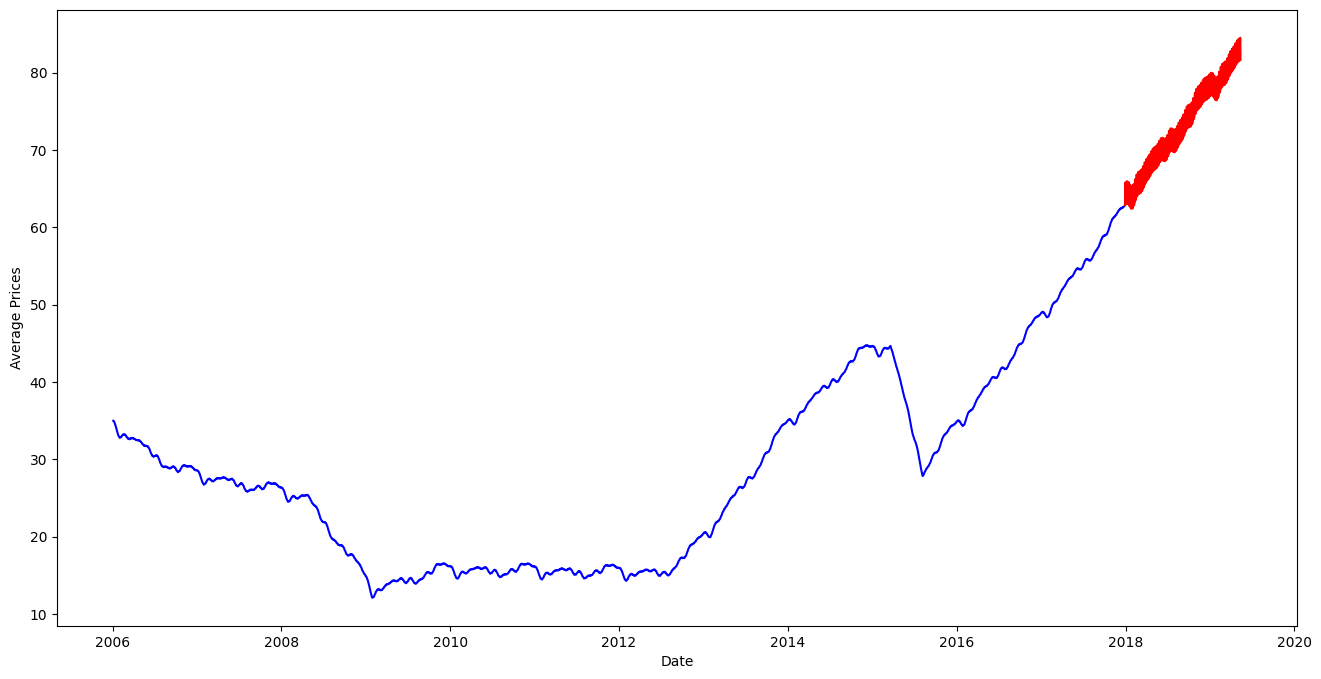

In [20]:
fig, ax1 = plt.subplots(figsize=(16, 8))
ax1.plot(forecastnew.set_index('ds'), color='b')
ax1.plot(forecastedvalues.set_index('ds'), color='r')
ax1.set_ylabel('Average Prices')
ax1.set_xlabel('Date')
print("Red = Predicted Values, Blue = Base Values")